# Time series: the weather in Göttingen from 1947 to 2015

## Data

The file ./data/produkt_klima_Tageswerte_19470101_20151231_01691.txt contains the daily measurements of the Göttingen weather station from 1947 untill 2015. It is just a plain text file, open it in a text editor to see how the data is organized.
This dataset along with many others can be downloaded from the FTP-server of the DWD (German Meteorological Office):
ftp://ftp-cdc.dwd.de/pub/CDC/

## Preprocessing

* Load the data with np.loadtxt. Hint: The first line is the header and the last column contains text. Use the parameters of np.loadtxt to exclude these. 

* For convenience, you can extract some interesting columns with slicing, e.g. MESS_DATUM (date), LUFTTEMPERATUR (air temperature), REL_FEUCHTE (humidity), NIEDERSCHLAGSHOEHE (precipitation), SONNENSCHEINDAUER (duration of sunshine), and store them in a 1d-array.

* Values of -999 indicate that there is no data available. This is annoying for many applications, e.g. if you compute the average or if you plot the data. Use a boolean index array to replace all -999 with the value np.nan ("nan" means not-a-number).

## Analysis

1. Plot air **temperature, humidity, precipitation** and the duration of **sunshine** of the data the last **three years**.

2. Plot a histogram of the temperature data. Mark the positions of the median, the mean, the upper and lower 20%-percentiles, ...

3. Retrieve the **value** of a time series given the **date**. Write a function which takes two arguments, a time series and a date, and returns the value of the time series on that specific day. 

4. Plot the average **temperature as a function of the year**.
    Suggestion: reshape the temperature time series into a two dimensional array such that its shape is 68 years x 365 days (before you do that you can use a boolean index array to remove the February 29th every four years). Then you can calculate the mean along one or the other axis to get a temperature profile of a year (averaged over all years) or the long-term trend of the temperature over 68 years, respectively. Both look even nicer if you do a moving average.

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Preprocessing

In [20]:
filename = './data/produkt_klima_Tageswerte_19470101_20151231_01691.txt'

df = pd.read_csv(filename, sep=';')
print(df.shape)
df.head()

(25202, 18)


,STATIONS_ID,MESS_DATUM,QUALITAETS_NIVEAU,LUFTTEMPERATUR,DAMPFDRUCK,BEDECKUNGSGRAD,LUFTDRUCK_STATIONSHOEHE,REL_FEUCHTE,WINDGESCHWINDIGKEIT,LUFTTEMPERATUR_MAXIMUM,LUFTTEMPERATUR_MINIMUM,LUFTTEMP_AM_ERDB_MINIMUM,WINDSPITZE_MAXIMUM,NIEDERSCHLAGSHOEHE,NIEDERSCHLAGSHOEHE_IND,SONNENSCHEINDAUER,SCHNEEHOEHE,eor
0,1691,19470101,5,-2.3,4.3,7.0,999.1,82.0,-999.0,-1.2,-4.5,-6.5,-999.0,1.0,7,-999.0,0,eor
1,1691,19470102,5,-0.2,5.2,7.7,1003.0,88.0,-999.0,0.9,-2.6,-4.9,-999.0,0.1,7,-999.0,1,eor
2,1691,19470103,5,-1.2,4.8,7.7,1010.7,83.0,-999.0,0.3,-3.6,-1.6,-999.0,0.0,0,-999.0,1,eor
3,1691,19470104,5,-9.2,2.4,2.0,1015.0,75.0,-999.0,-2.0,-12.0,-8.8,-999.0,0.0,0,-999.0,0,eor
4,1691,19470105,5,-13.2,1.5,0.0,1009.0,69.0,-999.0,-11.3,-14.6,-18.5,-999.0,0.0,0,-999.0,0,eor


Remove invalid data in sun duration

In [26]:
df['SONNENSCHEINDAUER'].loc[df['SONNENSCHEINDAUER'] < 0] = np.nan

/Users/florencia/venvs/py3venv/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Create new data frame with temperature, year day, month and year.

In [27]:
columns_df = ['LUFTTEMPERATUR', 'MESS_DATUM', 'SONNENSCHEINDAUER', 
              'REL_FEUCHTE', 'NIEDERSCHLAGSHOEHE']
df_ymd = pd.DataFrame(columns= columns_df + 
                               ['day_counter', 'month', 'year', 'yearday'], 
                      index=np.arange(len(df)))

#
df_ymd[columns_df] = df[columns_df]
df_ymd['day_counter'] = df_ymd.index # add column for counting the day

Populate data frame with the year, month and day

In [28]:
df_ymd['month'] = df_ymd['MESS_DATUM'].astype(str).apply(lambda x: x[4:6]).astype(np.int)
df_ymd['year'] = df_ymd['MESS_DATUM'].astype(str).apply(lambda x: x[:4]).astype(np.int)
df_ymd['yearday'] = 0

for yr in set(df_ymd['year']):
    thisyr = df_ymd['year'] == yr
    df_ymd.loc[thisyr, 'yearday'] = np.arange(np.count_nonzero(thisyr))
    
df_ymd.tail()

,LUFTTEMPERATUR,MESS_DATUM,SONNENSCHEINDAUER,REL_FEUCHTE,NIEDERSCHLAGSHOEHE,day_counter,month,year,yearday
25197,9.7,20151227,0.783,77.42,0.0,25197,12,2015,360
25198,8.3,20151228,5.383,84.46,0.0,25198,12,2015,361
25199,6.2,20151229,5.017,89.04,0.0,25199,12,2015,362
25200,4.8,20151230,0.000,84.17,0.0,25200,12,2015,363
25201,2.8,20151231,0.000,83.92,4.7,25201,12,2015,364


1. Plot values of the last 3 years.

Year seassons occur in the plot as cycles.

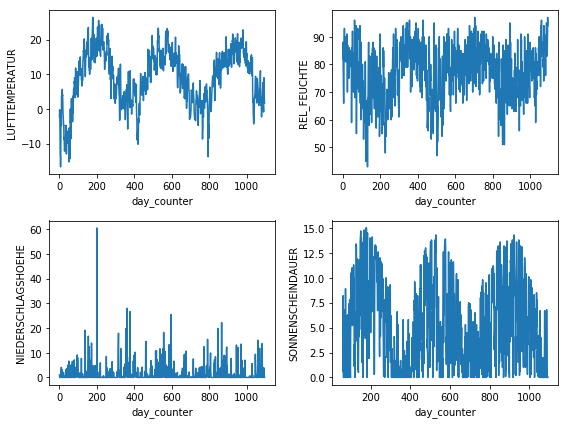

In [29]:
thisdf = df_ymd[:365*3]

fig, ax = plt.subplots(2,2, figsize=(8,6))
sns.lineplot(x='day_counter', y='LUFTTEMPERATUR', data=thisdf, ax=ax[0,0])
sns.lineplot(x='day_counter', y='REL_FEUCHTE', data=thisdf, ax=ax[0,1])
sns.lineplot(x='day_counter', y='NIEDERSCHLAGSHOEHE', data=thisdf, ax=ax[1,0])
sns.lineplot(x='day_counter', y='SONNENSCHEINDAUER', data=thisdf, ax=ax[1,1])

fig.tight_layout()

### Extract value on a specified date

In [37]:
value_name = 'LUFTTEMPERATUR'
date = 20080729

df[value_name].loc[df['MESS_DATUM'] == date]

22490    21.0
Name: LUFTTEMPERATUR, dtype: float64

### Histogram of the temperatures

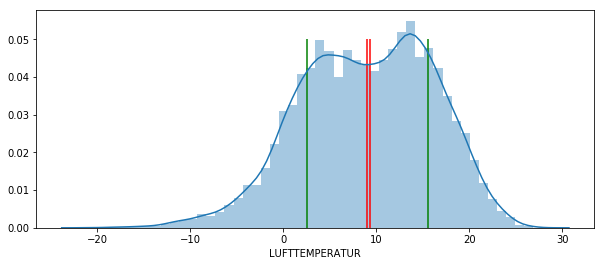

In [39]:
fig, ax = plt.subplots(figsize=(10,4))

temp_sorted = np.sort(df['LUFTTEMPERATUR'])

sns.distplot(df['LUFTTEMPERATUR'], ax=ax)
## mean, median and percentiles 
t_lower_20th_percentile = temp_sorted[int(len(temp_sorted)*0.2)]
t_lower_80th_percentile = temp_sorted[int(len(temp_sorted)*0.8)]
t_median = temp_sorted[int(len(temp_sorted)*0.5)]
t_mean = np.mean(df['LUFTTEMPERATUR']) 
ax.vlines(t_lower_20th_percentile, 0, 0.05, 'g')
ax.vlines(t_lower_80th_percentile, 0, 0.05, 'g')
ax.vlines(t_median, 0, 0.05, 'r')
ax.vlines(t_mean, 0, 0.05, 'r')

Average temperature per year day

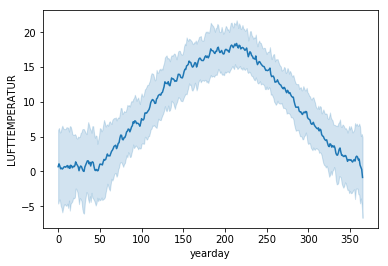

In [44]:
sns.lineplot(x='yearday', y='LUFTTEMPERATUR', data=df_ymd, ci="sd") 

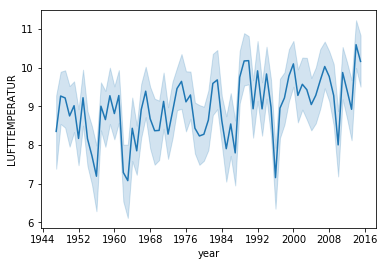

In [47]:
import matplotlib

ax = sns.lineplot(x='year', y='LUFTTEMPERATUR', data=df_ymd)#, hue='month')# err_style=)
ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(10))